In [1]:
import pandas as pd
import numpy as np
import sklearn as sc

In [2]:
from sklearn.metrics import log_loss as lg
from sklearn.metrics import confusion_matrix as conf
from sklearn.metrics import recall_score as rec
from sklearn.metrics import precision_score as pre
from sklearn.metrics import accuracy_score

In [3]:
accuracy = []
model = []

In [4]:
df_train = pd.read_csv("phishing_data_small.csv")
df_test = pd.read_csv("phishing_data_large.csv")
print(df_train.shape)
print(df_test.shape)

(58645, 112)
(88647, 112)


In [5]:
X_train = df_train.iloc[:, 0:111]
X_train.shape

(58645, 111)

In [6]:
Y_train = df_train.iloc[:, 111:112]
Y_train.shape

(58645, 1)

In [7]:
X_test = df_test.iloc[:, 0:111]
X_test.shape

(88647, 111)

In [8]:
Y_test = df_test.iloc[:, 111:112]
Y_test.shape

(88647, 1)

In [9]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [10]:
print("X_train.shape: "+str(X_train.shape))
print("Y_train.shape: "+str(Y_train.shape))
print("X_test.shape: "+str(X_test.shape))
print("Y_test.shape: "+str(Y_test.shape))

X_train.shape: (58645, 111)
Y_train.shape: (58645, 1)
X_test.shape: (88647, 111)
Y_test.shape: (88647, 1)


## KNN Classifier

In [11]:
from sklearn.neighbors import KNeighborsClassifier as knn

In [12]:
KNN_Model = knn(n_neighbors=5, leaf_size=300)

In [13]:
KNN_Model.fit(X_train, Y_train.values.ravel())

KNeighborsClassifier(leaf_size=300)

In [14]:
Y_pred = KNN_Model.predict(X_test)
print("Y_pred shape: "+str(Y_pred.shape))

Y_pred shape: (88647,)


In [15]:
Y_pred = Y_pred.reshape(Y_pred.shape[0], 1)
print("Y_pred shape: "+str(Y_pred.shape))

Y_pred shape: (88647, 1)


In [16]:
cnf = conf(Y_test, Y_pred)
cnf

array([[48648,  9352],
       [ 2620, 28027]], dtype=int64)

In [17]:
print("Precision Score: "+str(pre(Y_test, Y_pred, average="macro")))
print("Recall Score: "+str(rec(Y_test, Y_pred, average="macro")))
print("Accuracy Score: "+str(accuracy_score(Y_test, Y_pred)))

Precision Score: 0.8493510191641891
Recall Score: 0.8766345066119989
Accuracy Score: 0.8649474883526798


In [18]:
model.append("KNN")
accuracy.append(accuracy_score(Y_test, Y_pred))

In [19]:
# acc = lg(Y_train, Y_pred)
# print("The ACCURACY is: "+str(acc))

## Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression as lr

In [21]:
Logistic = lr(penalty="l2", max_iter=15000)

In [22]:
Logistic.fit(X_train, Y_train.values.ravel())

LogisticRegression(max_iter=15000)

In [23]:
Y_pred = Logistic.predict(X_test)
print("Y_pred shape: "+str(Y_pred.shape))

Y_pred shape: (88647,)


In [24]:
Y_pred = Y_pred.reshape(Y_pred.shape[0], 1)
print("Y_pred shape: "+str(Y_pred.shape))

Y_pred shape: (88647, 1)


In [25]:
cnf = conf(Y_test, Y_pred)
cnf

array([[53238,  4762],
       [ 2421, 28226]], dtype=int64)

In [26]:
print("Precision Score: "+str(pre(Y_test, Y_pred, average="macro")))
print("Recall Score: "+str(rec(Y_test, Y_pred, average="macro")))
print("Accuracy Score: "+str(accuracy_score(Y_test, Y_pred)))

Precision Score: 0.9060737341046962
Recall Score: 0.9194501194356651
Accuracy Score: 0.9189707491511275


In [27]:
model.append("Logistic Reg")
accuracy.append(accuracy_score(Y_test, Y_pred))

In [28]:
# acc = lg(Y_test, Y_pred)
# print("The ACCURACY is: "+str(acc))

## Decision Tree

In [29]:
from sklearn.tree import DecisionTreeClassifier as dec

In [30]:
decision = dec()

In [31]:
decision.fit(X_train, Y_train)

DecisionTreeClassifier()

In [32]:
Y_pred = decision.predict(X_test)
print("Y_pred shape: "+str(Y_pred.shape))

Y_pred shape: (88647,)


In [33]:
Y_pred = Y_pred.reshape(Y_pred.shape[0], 1)
print("Y_pred shape: "+str(Y_pred.shape))

Y_pred shape: (88647, 1)


In [34]:
cnf = conf(Y_test, Y_pred)
cnf

array([[57256,   744],
       [    6, 30641]], dtype=int64)

In [35]:
print("Precision Score: "+str(pre(Y_test, Y_pred, average="macro")))
print("Recall Score: "+str(rec(Y_test, Y_pred, average="macro")))
print("Accuracy Score: "+str(accuracy_score(Y_test, Y_pred)))

Precision Score: 0.988094813313127
Recall Score: 0.9934883180330414
Accuracy Score: 0.9915394768012454


In [36]:
model.append("Decision Tree")
accuracy.append(accuracy_score(Y_test, Y_pred))

## Random Forest

In [37]:
from sklearn.ensemble import RandomForestClassifier as rand

In [38]:
rf = rand(n_estimators=250)

In [39]:
rf.fit(X_train, Y_train.values.ravel())

RandomForestClassifier(n_estimators=250)

In [40]:
Y_pred = rf.predict(X_test)
Y_pred = Y_pred.reshape(Y_pred.shape[0], 1)

In [41]:
cnf = conf(Y_test, Y_pred)
cnf

array([[57891,   109],
       [    5, 30642]], dtype=int64)

In [42]:
print("Precision Score: "+str(pre(Y_test, Y_pred, average="macro")))
print("Recall Score: "+str(rec(Y_test, Y_pred, average="macro")))
print("Accuracy Score: "+str(accuracy_score(Y_test, Y_pred)))

Precision Score: 0.9981845190361444
Recall Score: 0.9989787707746609
Accuracy Score: 0.9987140004737893


In [43]:
model.append("Random Forest")
accuracy.append(accuracy_score(Y_test, Y_pred))

## MultiLayer Perceptron

In [44]:
from sklearn.neural_network import MLPClassifier as mlp

In [45]:
percep = mlp(hidden_layer_sizes=(60, 45, ), alpha=0.0001, learning_rate_init=0.001)

In [46]:
percep.fit(X_train, Y_train.values.ravel())

C:\Users\gsrav\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(60, 45))

In [47]:
Y_pred = percep.predict(X_test)
Y_pred = Y_pred.reshape(Y_pred.shape[0], 1)

In [48]:
cnf = conf(Y_test, Y_pred)
cnf

array([[54850,  3150],
       [ 2444, 28203]], dtype=int64)

In [49]:
print("Precision Score: "+str(pre(Y_test, Y_pred, average="macro")))
print("Recall Score: "+str(rec(Y_test, Y_pred, average="macro")))
print("Accuracy Score: "+str(accuracy_score(Y_test, Y_pred)))

Precision Score: 0.9284369867821514
Recall Score: 0.9329714305163468
Accuracy Score: 0.936895777634889


In [50]:
model.append("M-Perceptron")
accuracy.append(accuracy_score(Y_test, Y_pred))

## Boosting Algorithms

In [51]:
from sklearn.ensemble import GradientBoostingClassifier as gbclassifier

In [52]:
gbc = gbclassifier()

In [53]:
gbc.fit(X_train, Y_train.values.ravel())

GradientBoostingClassifier()

In [54]:
Y_pred = gbc.predict(X_test)
Y_pred = Y_pred.reshape(Y_pred.shape[0], 1)

In [55]:
cnf = conf(Y_test, Y_pred)
cnf

array([[55946,  2054],
       [ 1816, 28831]], dtype=int64)

In [56]:
print("Precision Score: "+str(pre(Y_test, Y_pred, average="macro")))
print("Recall Score: "+str(rec(Y_test, Y_pred, average="macro")))
print("Accuracy Score: "+str(accuracy_score(Y_test, Y_pred)))

Precision Score: 0.9510279348129458
Recall Score: 0.9526654074258267
Accuracy Score: 0.9563437002944262


In [57]:
model.append("Gradient Boosting")
accuracy.append(accuracy_score(Y_test, Y_pred))

In [58]:
# Adaboost

In [59]:
from sklearn.ensemble import AdaBoostClassifier as abclassifier

In [60]:
abc = abclassifier()

In [61]:
abc.fit(X_train, Y_train.values.ravel())

AdaBoostClassifier()

In [62]:
Y_pred = abc.predict(X_test)
Y_pred = Y_pred.reshape(Y_pred.shape[0], 1)

In [63]:
cnf = conf(Y_test, Y_pred)
cnf

array([[55091,  2909],
       [ 2607, 28040]], dtype=int64)

In [64]:
print("Precision Score: "+str(pre(Y_test, Y_pred, average="macro")))
print("Recall Score: "+str(rec(Y_test, Y_pred, average="macro")))
print("Accuracy Score: "+str(accuracy_score(Y_test, Y_pred)))

Precision Score: 0.9304115571105671
Recall Score: 0.9323897025978805
Accuracy Score: 0.9377756720475594


In [65]:
model.append("AdaBoost")
accuracy.append(accuracy_score(Y_test, Y_pred))

## Comparision Of Accuracies

In [66]:
print(model)
print(accuracy)

['KNN', 'Logistic Reg', 'Decision Tree', 'Random Forest', 'M-Perceptron', 'Gradient Boosting', 'AdaBoost']
[0.8649474883526798, 0.9189707491511275, 0.9915394768012454, 0.9987140004737893, 0.936895777634889, 0.9563437002944262, 0.9377756720475594]


In [67]:
import matplotlib.pyplot as plt

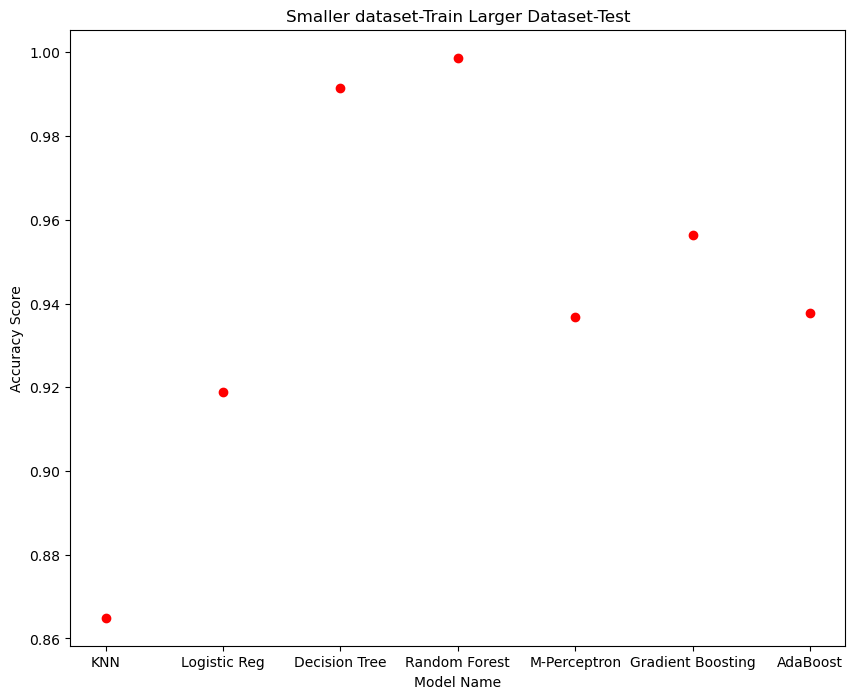

In [68]:
plt.figure(figsize=(10,8))
plt.title("Smaller dataset-Train Larger Dataset-Test")
plt.xlabel("Model Name")
plt.ylabel("Accuracy Score")
plt.plot(model, accuracy, "or")